In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import datetime as dt

## Florida

In [2]:
florida = pd.read_csv("FL_NOI.csv", index_col = 0)

In [3]:
florida.head()

SCAPN        SCSitus_NumNam_x PropID  \
0  FL Pinellas 19-31-17-74466-052-0040  FL Pinellas540 2nd Ave  P2834   
1  FL Pinellas 19-31-17-74466-011-0090  FL Pinellas235 3rd Ave  P2837   
2  FL Pinellas 19-31-17-74466-011-0090  FL Pinellas235 3rd Ave  P2837   
3  FL Pinellas 19-31-17-78428-002-0010  FL Pinellas430 3rd Ave  P2838   
4  FL Pinellas 19-31-17-78428-002-0010  FL Pinellas430 3rd Ave  P2838   

   Star_rating              City State        Zip    County For_sale_price  \
0            2  Saint Petersburg    FL  33701      Pinellas            NaN   
1            4  Saint Petersburg    FL  337014242  Pinellas            NaN   
2            4  Saint Petersburg    FL  337014242  Pinellas            NaN   
3            4  Saint Petersburg    FL  337013294  Pinellas            NaN   
4            4  Saint Petersburg    FL  337013294  Pinellas            NaN   

  For_sale_status  ...  Assessed_yr  Floor_area_ratio  Num_floors  \
0             NaN  ...          NaN               NaN         NaN   
1             NaN  ...       2015.0          3.393541         8.0   
2             NaN  ...       2017.0          3.393541         8.0   
3          Active  ...       2014.0          2.920778         4.0   
4          Active  ...       2014.0          2.920778         4.0   

   Price_per_sqft  Land_price_per_AC   Sale_date  Sale_price       Price  \
0             NaN                NaN         NaN         NaN  10150000.0   
1          277.96        41088269.58  2016-12-14  77550000.0  77550000.0   
2             NaN                NaN  2017-06-20         NaN  66800000.0   
3          152.81        19441376.77  2015-09-16  84500000.0  84500000.0   
4           56.01         7125921.87  2015-09-16  10437600.0  10437600.0   

  Concession_value           NOI  
0          71050.0  6.049110e+05  
1         387750.0  5.536632e+06  
2         334000.0  4.612948e+06  
3         591500.0  3.817694e+06  
4          73063.2  4.120798e+05  

[5 rows x 74 columns]

In [48]:
florida.columns.unique()

Index(['SCAPN', 'SCSitus_NumNam_x', 'PropID', 'Star_rating', 'City', 'State',
       'Zip', 'County', 'For_sale_price', 'For_sale_status', 'Land_area',
       'Num_units', 'Cap_rate', 'Vacancy_%', 'Avg_unit_sqft',
       'Avg_Concession_%', 'Parking_per_unit', 'Days_on_mkt', 'Amenities',
       'Year_built', 'Year_reno', 'Last_sale_date', 'Last_sale_price',
       'Transit_dist_mile', 'Transit_walk_time_min', 'Const_material',
       'Num_studio', 'Studio_rent_sqft', 'Studio_avg_sqft',
       'Studio_concession_%', 'Studio_vacancy_%', 'Num_1_bed',
       '1_bed_rent_sqft', '1_bed_avg_sqft', '1_bed_concession_%',
       '1_bed_vacancy_%', 'Num_2_bed', '2_bed_rent_sqft', '2_bed_avg_sqft',
       '2_bed_concession_%', '2_bed_vacancy_%', 'Num_3_bed', '3_bed_rent_sqft',
       '3_bed_avg_sqft', '3_bed_concession_%', '3_bed_vacancy_%', 'Num_4_bed',
       '4_bed_rent_sqft', '4_bed_avg_sqft', '4_bed_concession_%',
       '4_bed_vacancy_%', '2010_Avg_age', '2019_Avg_age', '2019_Pop_25_39',
   

In [21]:
## Pick out variables that we are interested in
fl_reg_data = florida[["Star_rating", 
                       "City",
                       "County",
                       "Land_area",
                       "Vacancy_%",
                       "Num_units",
                       "Num_studio",
                       "Num_1_bed",
                       "Num_2_bed",
                       "Num_3_bed",
                       "Num_4_bed",
                       "Avg_unit_sqft",
                       "Parking_per_unit",
                      "Year_built",
                      "Transit_dist_mile",
                       "Transit_walk_time_min",
                      "Floor_area_ratio",
                       "Num_floors",
                      "Price_per_sqft"]]

In [22]:
corr = fl_reg_data.corr()

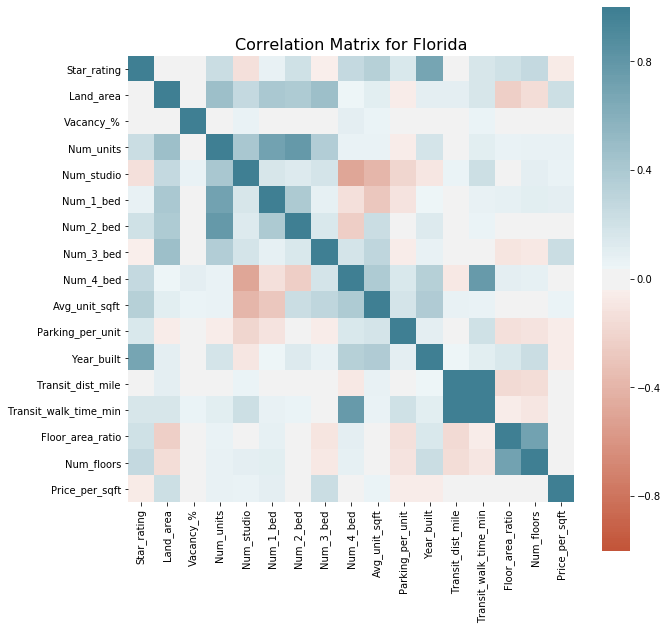

In [23]:
plt.figure(figsize = (10,10))

ax = sns.heatmap(corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)

plt.title("Correlation Matrix for Florida", fontsize = 16)

plt.show()

## Georgia

In [7]:
georgia = pd.read_csv("GA_NOI.csv", index_col = 0)

In [13]:
georgia.columns.unique()

Index(['Unnamed: 0.1', 'Unnamed: 0_x', 'SCAPN', 'SCSitus_NumNam_x', 'PropID',
       'Star_rating', 'City', 'State', 'Zip', 'County', 'For_sale_price',
       'For_sale_status', 'Land_area', 'Num_units', 'Cap_rate', 'Vacancy_%',
       'Avg_unit_sqft', 'Avg_Concession_%', 'Parking_per_unit', 'Days_on_mkt',
       'Amenities', 'Year_built', 'Year_reno', 'Last_sale_date',
       'Last_sale_price', 'Transit_dist_mile', 'Transit_walk_time_min',
       'Const_material', 'Num_studio', 'Studio_rent_sqft', 'Studio_avg_sqft',
       'Studio_concession_%', 'Studio_vacancy_%', 'Num_1_bed',
       '1_bed_rent_sqft', '1_bed_avg_sqft', '1_bed_concession_%',
       '1_bed_vacancy_%', 'Num_2_bed', '2_bed_rent_sqft', '2_bed_avg_sqft',
       '2_bed_concession_%', '2_bed_vacancy_%', 'Num_3_bed', '3_bed_rent_sqft',
       '3_bed_avg_sqft', '3_bed_concession_%', '3_bed_vacancy_%', 'Num_4_bed',
       '4_bed_rent_sqft', '4_bed_avg_sqft', '4_bed_concession_%',
       '4_bed_vacancy_%', '2010_Avg_age', '2019

In [24]:
## Pick out variables that we are interested in
ga_reg_data = georgia[["Star_rating", 
                       "City",
                       "County",
                       "Land_area",
                       "Vacancy_%",
                       "Num_units",
                       "Num_studio",
                       "Num_1_bed",
                       "Num_2_bed",
                       "Num_3_bed",
                       "Num_4_bed",
                       "Avg_unit_sqft",
                       "Parking_per_unit",
                      "Year_built",
                      "Transit_dist_mile",
                       "Transit_walk_time_min",
                      "Floor_area_ratio",
                       "Num_floors",
                      "Price_per_sqft"]]

In [25]:
corr = ga_reg_data.corr()

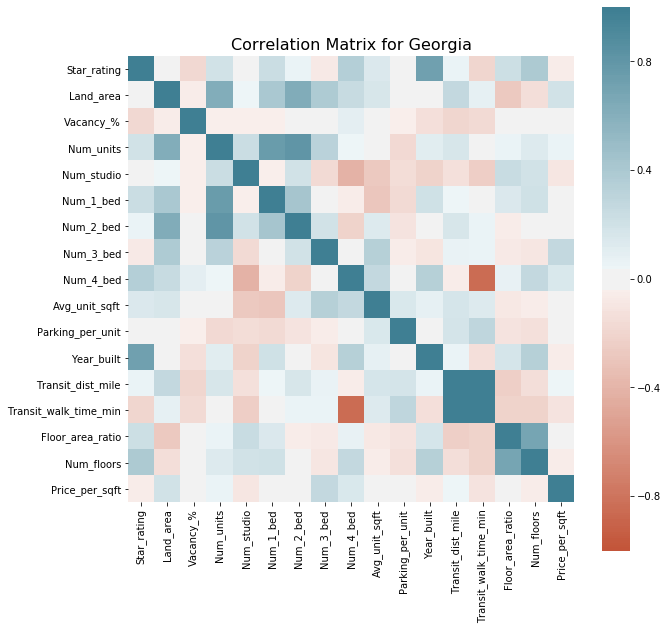

In [26]:
plt.figure(figsize = (10,10))

sns.heatmap(corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)

plt.title("Correlation Matrix for Georgia", fontsize = 16)

plt.show()

## North Carolina

In [13]:
carolina = pd.read_csv("NC_NOI.csv", index_col = 0)

In [84]:
carolina.columns.unique()

Index(['Unnamed: 0_x', 'SCAPN', 'SCSitus_NumNam_x', 'PropID', 'Star_rating',
       'City', 'State', 'Zip', 'County', 'For_sale_price', 'For_sale_status',
       'Land_area', 'Num_units', 'Cap_rate', 'Vacancy_%', 'Avg_unit_sqft',
       'Avg_Concession_%', 'Parking_per_unit', 'Days_on_mkt', 'Amenities',
       'Year_built', 'Year_reno', 'Last_sale_date', 'Last_sale_price',
       'Transit_dist_mile', 'Transit_walk_time_min', 'Const_material',
       'Num_studio', 'Studio_rent_sqft', 'Studio_avg_sqft',
       'Studio_concession_%', 'Studio_vacancy_%', 'Num_1_bed',
       '1_bed_rent_sqft', '1_bed_avg_sqft', '1_bed_concession_%',
       '1_bed_vacancy_%', 'Num_2_bed', '2_bed_rent_sqft', '2_bed_avg_sqft',
       '2_bed_concession_%', '2_bed_vacancy_%', 'Num_3_bed', '3_bed_rent_sqft',
       '3_bed_avg_sqft', '3_bed_concession_%', '3_bed_vacancy_%', 'Num_4_bed',
       '4_bed_rent_sqft', '4_bed_avg_sqft', '4_bed_concession_%',
       '4_bed_vacancy_%', '2010_Avg_age', '2019_Avg_age', '2019

In [27]:
## Pick out variables that we are interested in
carolina_reg_data = carolina[["Star_rating", 
                       "City",
                       "County",
                       "Land_area",
                       "Vacancy_%",
                       "Num_units",
                       "Num_studio",
                       "Num_1_bed",
                       "Num_2_bed",
                       "Num_3_bed",
                       "Num_4_bed",
                       "Avg_unit_sqft",
                       "Parking_per_unit",
                      "Year_built",
                      "Transit_dist_mile",
                       "Transit_walk_time_min",
                      "Floor_area_ratio",
                        "Num_floors",
                      "Price_per_sqft"]]

In [28]:
corr = carolina_reg_data.corr()

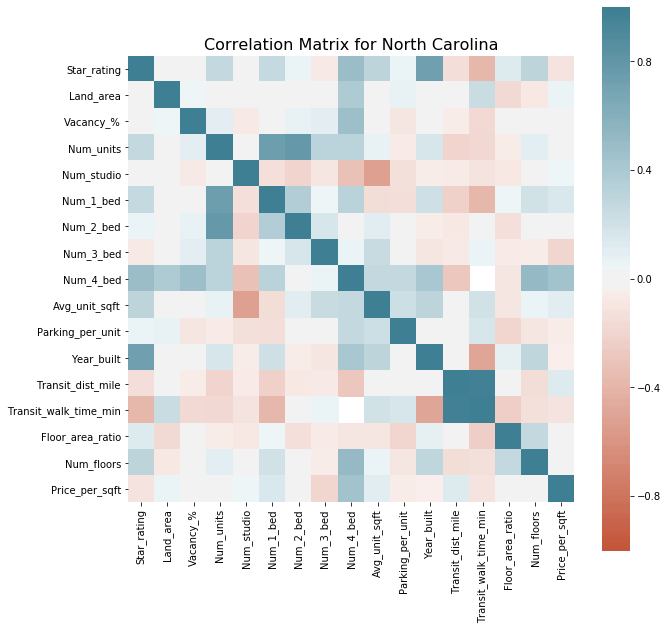

In [29]:
plt.figure(figsize = (10,10))

sns.heatmap(corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)

plt.title("Correlation Matrix for North Carolina", fontsize = 16)

plt.show()

## Texas

In [17]:
texas = pd.read_csv("TX_NOI.csv", index_col = 0)

In [244]:
texas.head()

index  Unnamed: 0.1  Unnamed: 0_x                     SCAPN  \
0      0             1             1   TX Bexar 00273-002-0011   
1      1             4             4  TX Travis 04120906540000   
2      2             5             5            TX Brown 55022   
3      3             6             6         TX Lubbock R94203   
4      4             7             6         TX Lubbock R94203   

        SCSitus_NumNam_x  PropID  Star_rating         City State        Zip  \
0    TX Bexar939 Frio St  P10570            4  San Antonio    TX      78207   
1   TX Travis5112 1st St  P10573            3       Austin    TX  787452293   
2    TX Brown2801 4th St  P10574            3    Brownwood    TX  768016161   
3  TX Lubbock5525 4th St  P10575            2      Lubbock    TX  794164230   
4  TX Lubbock5525 4th St  P10575            2      Lubbock    TX  794164230   

   ... Assessed_yr  Floor_area_ratio Num_floors  Price_per_sqft  \
0  ...      2016.0          0.853417        5.0           175.0   
1  ...         NaN               NaN        NaN             NaN   
2  ...      2014.0          0.306697        2.0             NaN   
3  ...      2015.0          0.339285        1.0             NaN   
4  ...      2011.0          0.339285        1.0             NaN   

   Land_price_per_AC                      Sale_date  Sale_price       Price  \
0         6505576.21  1970-01-01 00:00:00.000042719  17500000.0  17500000.0   
1                NaN                            NaN         NaN  10000000.0   
2                NaN  1970-01-01 00:00:00.000042048         NaN   1644010.0   
3                NaN  1970-01-01 00:00:00.000042250         NaN   2240725.0   
4                NaN  1970-01-01 00:00:00.000040997         NaN   2106883.0   

   Concession_value            NOI  
0        105000.000  892926.393270  
1         60000.000  467114.698218  
2          6576.040  115386.377347  
3         15685.075  134619.352154  
4         14748.181  124489.406682  

[5 rows x 77 columns]

In [30]:
## Pick out variables that we are interested in
texas_reg_data = texas[["Star_rating", 
                       "City",
                       "County",
                       "Land_area",
                       "Vacancy_%",
                       "Num_units",
                       "Num_studio",
                       "Num_1_bed",
                       "Num_2_bed",
                       "Num_3_bed",
                       "Num_4_bed",
                       "Avg_unit_sqft",
                       "Parking_per_unit",
                      "Year_built",
                      "Transit_dist_mile",
                       "Transit_walk_time_min",
                      "Floor_area_ratio",
                        "Num_floors",
                      "Price_per_sqft"]]

In [31]:
corr = texas_reg_data.corr()

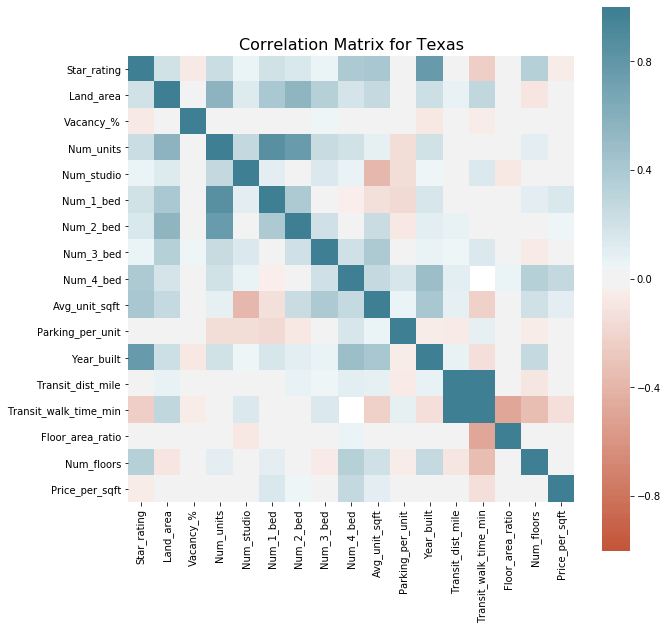

In [32]:
plt.figure(figsize = (10,10))

sns.heatmap(corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)

plt.title("Correlation Matrix for Texas", fontsize = 16)

plt.show()